In [0]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [30]:
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)
print(labels)

(1000, 2) (1000,)
[0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1
 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 

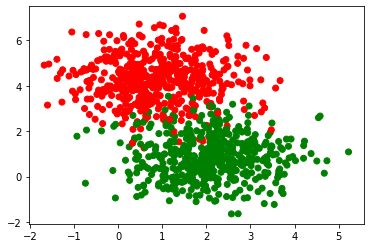

In [31]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(data, labels, stratify=labels, random_state = 2, test_size=.2)
print(X_train.shape,X_test.shape)

(800, 2) (200, 2)


In [0]:
model = linear_model.LogisticRegression()

In [34]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_pred = model.predict(X_test)
Y_pred_prob = model.predict_proba(X_test)


In [36]:
ascore = accuracy_score(Y_test,Y_pred)
print(ascore)

0.96


In [37]:
coeff = model.coef_
intercept = model.intercept_
print(intercept,coeff)

[6.60435903] [[ 0.76193208 -2.99573938]]


In [0]:
arr = np.array([1,2,0,3,5])
arr.max()
a , b = 1,2

In [0]:
x1min, x1max = X_test[:,0].min()-.5, X_test[:,0].max()+.5
x2min, x2max = X_test[:,1].min()-.5, X_test[:,1].max()+.5
xvals = np.arange(x1min,x1max,.2)
yvals = np.arange(x2min,x2max,.2)
xx, yy = np.meshgrid(xvals,yvals)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

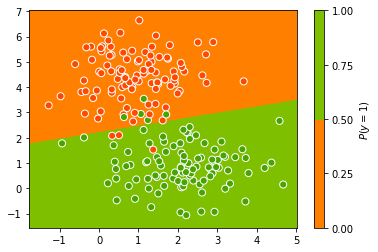

In [40]:
f, ax = plt.subplots()
contour = ax.contourf(xx, yy, probs,1, cmap=my_cmap,
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:,0], X_test[:, 1], c=Y_test, s=50,
           cmap=my_cmap, vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

